In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [29]:
# Generate Latitudes and Longitudes
lats = np.random.uniform(-90,90,1500)
lngs = np.random.uniform(-180,180,1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [30]:
coordinates = list(lats_lngs)
coordinates

[(11.923133230731594, -131.89510027047885),
 (-59.08946939444119, 68.90447081166968),
 (86.99021796160079, 115.27334748542683),
 (50.308262308693344, -89.81592735781484),
 (56.36794040208437, -61.75751892319924),
 (84.49288158278833, -49.97286864367439),
 (26.662937873016517, -108.27248765644087),
 (-7.409349588081753, -21.28707579548137),
 (-12.942653452717096, 172.04272817287682),
 (-68.48195926051935, -16.721056237752435),
 (-56.198093840674574, -161.7591021633421),
 (-75.23665553575364, -54.089854601322784),
 (88.94158284760533, 168.60811749176548),
 (-87.44539482563823, 78.39310477032348),
 (71.7830464188722, -31.108130660240818),
 (82.79831520876078, 23.44479632750088),
 (11.979164695223474, -47.791846143523316),
 (53.08664419908769, 135.2631836420988),
 (-60.6942340908445, -97.08352990839316),
 (-38.07556480312347, 117.46134279980782),
 (-41.02782775515075, -138.03801953571616),
 (61.72372755801345, 52.822091506537106),
 (7.586219694469719, 116.01450502472994),
 (45.921464353786

In [31]:
# Create City list
city_list = []
for i in coordinates:
    x = citipy.nearest_city(i[0],i[1]).city_name
    if x not in city_list:
        city_list.append(x)

In [32]:
len(city_list)

621

In [33]:
city_data = []
set_num = 1
record_num = 1

# Print the beginning of the logging.
print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")

for i in range(0,len(city_list)):
    if (i%50 == 0 and i>=50):
        set_num +=1
        record_num = 1
    x = city_list[i]
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key + "&q=" + x.replace(" ","+")
    weather_response = requests.get(url)
    try:
        weather_json = weather_response.json()
        city_data.append({
                        'City' : weather_json['name'], 
                        'Country' : weather_json['sys']['country'],
                        'Date' : datetime.utcfromtimestamp(weather_json['dt']).strftime('%Y-%m-%d %H:%M:%S'),
                        'Lat' : weather_json['coord']['lat'],
                        'Lon' : weather_json['coord']['lon'],
                        'Max Temp' : weather_json['main']['temp_max'],
                        'Humidity' : weather_json['main']['humidity'],
                        'Cloudiness' : weather_json['clouds']['all'],
                        'Wind Speed' : weather_json['wind']['speed']
                        })
        print(f"Processed record {record_num} of set {set_num} | {x}")
        record_num += 1
    except:
        print(f"{x} not found! Skipping..")

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval     
-----------------------------
Processed record 1 of set 1 | atuona
Processed record 2 of set 1 | saint-philippe
Processed record 3 of set 1 | saskylakh
Processed record 4 of set 1 | thunder bay
Processed record 5 of set 1 | saint-augustin
Processed record 6 of set 1 | upernavik
Processed record 7 of set 1 | choix
Processed record 8 of set 1 | georgetown
Processed record 9 of set 1 | sola
Processed record 10 of set 1 | cape town
Processed record 11 of set 1 | avarua
Processed record 12 of set 1 | ushuaia
Processed record 13 of set 1 | pevek
Processed record 14 of set 1 | busselton
Processed record 15 of set 1 | tasiilaq
Processed record 16 of set 1 | longyearbyen
Processed record 17 of set 1 | sinnamary
Processed record 18 of set 1 | imeni poliny osipenko
Processed record 19 of set 1 | punta arenas
Processed record 20 of set 1 | albany
Processed record 21 of set 1 | rikitea
Processed record 22 of set 1 | ust-kulom
Processed rec

Processed record 4 of set 5 | yeppoon
bababe not found! Skipping..
grand river south east not found! Skipping..
Processed record 5 of set 5 | lebu
Processed record 6 of set 5 | vallenar
Processed record 7 of set 5 | bardiyah
Processed record 8 of set 5 | emirdag
taolanaro not found! Skipping..
Processed record 9 of set 5 | kashi
buqayq not found! Skipping..
Processed record 10 of set 5 | saint-pierre
Processed record 11 of set 5 | ribeira grande
Processed record 12 of set 5 | port lincoln
mahadday weyne not found! Skipping..
Processed record 13 of set 5 | palmer
Processed record 14 of set 5 | mitu
Processed record 15 of set 5 | halifax
Processed record 16 of set 5 | okhotsk
Processed record 17 of set 5 | uglekamensk
Processed record 18 of set 5 | slavutych
Processed record 19 of set 5 | grindavik
Processed record 20 of set 5 | vardo
Processed record 21 of set 5 | mayumba
Processed record 22 of set 5 | coihaique
Processed record 23 of set 5 | turriff
Processed record 24 of set 5 | baths

Processed record 12 of set 9 | isangel
Processed record 13 of set 9 | plymouth
candawaga not found! Skipping..
Processed record 14 of set 9 | bull savanna
Processed record 15 of set 9 | ketchikan
Processed record 16 of set 9 | cap-aux-meules
Processed record 17 of set 9 | werota
Processed record 18 of set 9 | leopold
Processed record 19 of set 9 | ndele
Processed record 20 of set 9 | brae
Processed record 21 of set 9 | shimanovsk
Processed record 22 of set 9 | chicama
Processed record 23 of set 9 | polunochnoye
Processed record 24 of set 9 | mayo
Processed record 25 of set 9 | oussouye
karkaralinsk not found! Skipping..
Processed record 26 of set 9 | port keats
Processed record 27 of set 9 | vicente guerrero
Processed record 28 of set 9 | srednekolymsk
Processed record 29 of set 9 | rawson
Processed record 30 of set 9 | santa rosa
formoso do araguaia not found! Skipping..
Processed record 31 of set 9 | faanui
Processed record 32 of set 9 | inuvik
Processed record 33 of set 9 | bose
Pro

Processed record 17 of set 13 | seryshevo
Processed record 18 of set 13 | maracai
Processed record 19 of set 13 | sault sainte marie
Processed record 20 of set 13 | bandarbeyla
doctor pedro p. pena not found! Skipping..
-----------------------------
Data Retrieval Complete      
-----------------------------


In [34]:
weather_df = pd.DataFrame(city_data)

In [35]:
weather_df = weather_df.reset_index().drop(columns = ['index'])
weather_df

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-04-01 01:26:23,-9.8000,-139.0333,80.74,77,44,12.44
1,Saint-Philippe,RE,2021-04-01 01:26:23,-21.3585,55.7679,78.80,78,0,9.22
2,Saskylakh,RU,2021-04-01 01:26:24,71.9167,114.0833,-26.12,99,100,7.52
3,Thunder Bay,CA,2021-04-01 01:24:56,48.4001,-89.3168,23.00,42,20,4.61
4,Saint-Augustin,CA,2021-04-01 01:26:24,51.2260,-58.6502,19.63,91,100,3.38
...,...,...,...,...,...,...,...,...,...
561,Cap Malheureux,MU,2021-04-01 01:29:27,-19.9842,57.6142,75.99,85,12,3.00
562,Seryshevo,RU,2021-04-01 01:29:27,51.0933,128.3786,44.80,57,36,13.35
563,Maracaí,BR,2021-04-01 01:29:28,-22.6106,-50.6672,64.60,63,0,3.36
564,Sault Ste. Marie,CA,2021-04-01 01:29:28,46.5168,-84.3333,24.80,50,90,13.80


In [36]:
output_file_path = "../Resources/cities_weather_data.csv"
weather_df.to_csv(output_file_path,index_label="City_ID")

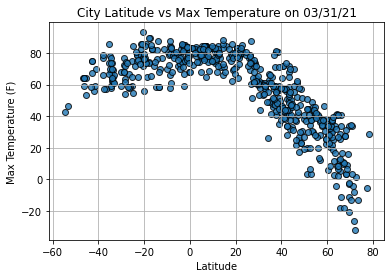

In [66]:
# Latitude vs Max Temperature
plt.scatter(
    x = weather_df['Lat'],
    y = weather_df['Max Temp'],
    alpha = 0.8,
    edgecolor = 'black',
    linewidths = 1
)
plt.title('City Latitude vs Max Temperature on ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('../Resources/Fig1.png')

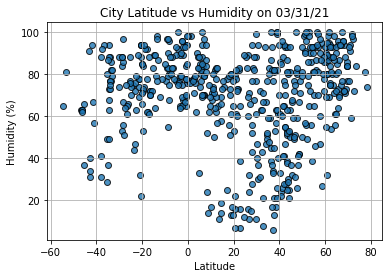

In [76]:
# Latitude vs Humidity
plt.scatter(
    x = weather_df['Lat'],
    y = weather_df['Humidity'],
    alpha = 0.8,
    edgecolor = 'black',
    linewidths = 1
)
plt.title('City Latitude vs Humidity on ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('../Resources/Fig2.png')

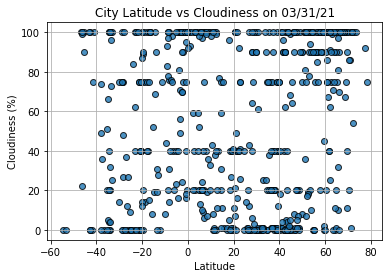

In [77]:
# Latitude vs Cloudiness
plt.scatter(
    x = weather_df['Lat'],
    y = weather_df['Cloudiness'],
    alpha = 0.8,
    edgecolor = 'black',
    linewidths = 1
)
plt.title('City Latitude vs Cloudiness on ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('../Resources/Fig3.png')

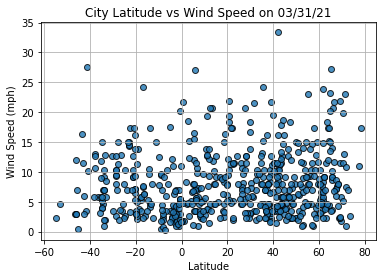

In [73]:
# Latitude vs Wind Speed
plt.scatter(
    x = weather_df['Lat'],
    y = weather_df['Wind Speed'],
    alpha = 0.8,
    edgecolor = 'black',
    linewidths = 1
)
plt.title('City Latitude vs Wind Speed on ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('../Resources/Fig4.png')